# I] Import functions and options

In [5]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [6]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [7]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download - Protein Gene expression 

In [10]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + 'dataframes_for_input/pancreas/'
pancreas_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_pancreas_atg7_proteinGE_all.tsv", sep = "\t")
pancreas_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_pancreas_atg7_proteinGE_all.tsv", sep = "\t")

print("Normal tissue shape is:", pancreas_normal_atg7_proteinGE.shape)
print("Primary tumor shape is:", pancreas_primary_atg7_proteinGE.shape)
pancreas_normal_atg7_proteinGE.head(2)

Normal tissue shape is: (167, 19387)
Primary tumor shape is: (178, 19387)
Wall time: 5.87 s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Pancreas,3.259,2.064,0.6239,12.5552,12.796,13.5489,13.4342,14.4641,...,2.0289,4.9924,4.0506,0.3907,4.6165,3.9719,2.1606,5.2028,4.8768,3.7204
1,Normal Tissue,Pancreas,3.216,2.635,-1.4700,13.0496,13.603,13.7792,14.4138,15.0967,...,0.4016,5.7918,4.8610,1.4281,4.8949,5.0960,3.0498,5.6741,1.5661,5.4858


In [11]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 38.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and the candidate genes

In [12]:
#create functions:
def log2_to_value(x):
    return 2**x

def value_to_log2(x):
    return numpy.log2(x+1)

In [13]:
%%time
# Round the tpm value, then go back to log2(tpm+1)
data = [pancreas_normal_atg7_proteinGE, pancreas_primary_atg7_proteinGE]

for df in data:
    df.iloc[:,2:] = df.iloc[:,2:].apply(log2_to_value)
    df.iloc[:,2:] = df.iloc[:,2:].round(0)
    df.iloc[:,2:] = df.iloc[:,2:].apply(value_to_log2)
    
df

Wall time: 39 s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Primary Tumor,Pancreas,5.044394,4.584963,2.000000,10.143383,11.144021,11.766943,12.611486,11.901998,...,0.000000,5.807355,5.044394,2.000000,4.584963,6.409391,2.321928,6.918863,3.906891,6.629357
1,Primary Tumor,Pancreas,4.954196,3.169925,3.000000,12.569856,13.363998,14.020546,13.768701,14.373545,...,1.584963,5.832890,5.426265,2.807355,4.754888,5.523562,2.584963,5.807355,5.169925,3.906891
2,Primary Tumor,Pancreas,4.857981,3.321928,2.807355,11.840778,12.029977,13.696859,12.741678,13.647346,...,2.807355,5.807355,5.087463,1.584963,5.044394,5.285402,3.584963,5.523562,4.321928,2.321928
3,Primary Tumor,Pancreas,4.857981,3.906891,2.321928,12.010178,12.212496,13.783203,13.610564,13.387613,...,2.584963,5.930737,5.321928,4.000000,5.247928,5.426265,3.000000,5.977280,3.459432,4.754888
4,Primary Tumor,Pancreas,4.807355,3.584963,2.807355,10.839204,11.010528,13.019591,12.083479,12.555068,...,2.000000,6.066089,5.392317,3.459432,5.357552,5.321928,3.459432,6.000000,2.584963,2.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Primary Tumor,Pancreas,3.000000,2.000000,1.584963,12.376397,12.727282,14.113417,13.621937,14.281568,...,3.169925,5.857981,5.285402,3.459432,4.584963,4.392317,2.584963,5.614710,1.584963,4.392317
174,Primary Tumor,Pancreas,3.000000,2.000000,1.000000,11.743572,11.911392,13.118130,12.537218,13.525276,...,4.169925,4.392317,3.807355,1.000000,3.584963,4.000000,2.321928,4.584963,2.584963,2.584963
175,Primary Tumor,Pancreas,2.807355,2.000000,1.000000,12.519636,13.091105,14.320236,14.638266,13.252222,...,1.000000,4.807355,4.247928,1.584963,4.807355,5.209453,4.247928,5.754888,1.584963,4.906891
176,Primary Tumor,Pancreas,2.321928,2.000000,0.000000,10.805744,10.431498,11.360298,11.952013,9.292322,...,4.523562,3.807355,3.169925,0.000000,2.807355,3.584963,1.584963,5.129283,1.000000,2.807355


In [14]:
#to know the ensembl code for the candidates
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'PFKP']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
14229,ENSG00000067057,PFKP,5214.0,protein_coding


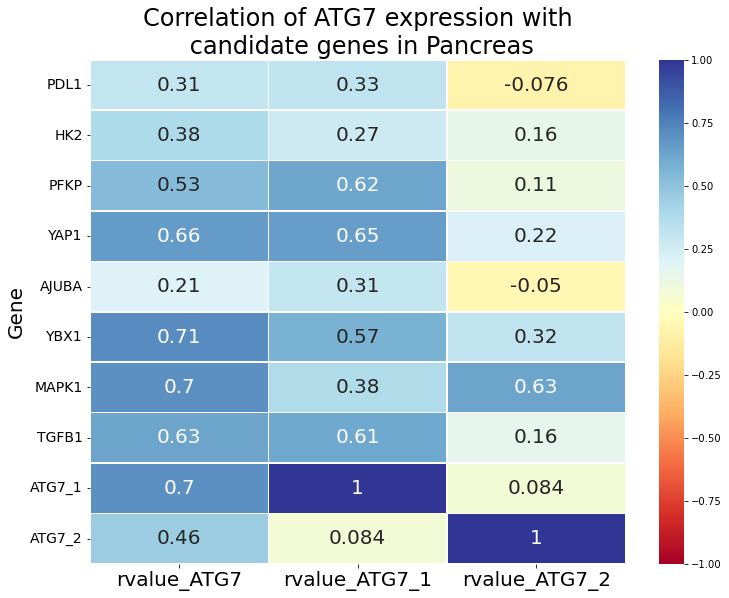

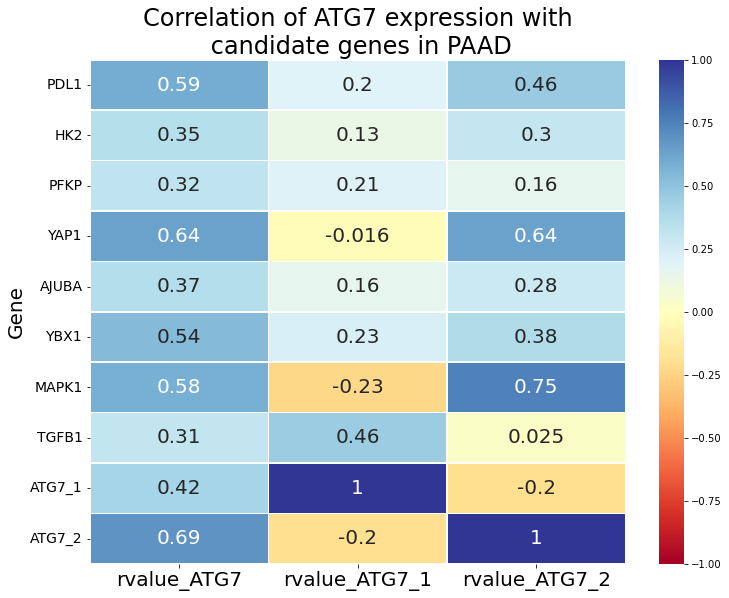

<Figure size 864x576 with 0 Axes>

In [17]:
# Spearman Correlation, main genes 
all_tissue_used = [[pancreas_normal_atg7_proteinGE,'Pancreas'], 
                   [pancreas_primary_atg7_proteinGE,'PAAD']]

PDL1 = 'ENSG00000120217'
HK2 = 'ENSG00000159399'
PFKP = 'ENSG00000067057'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
    gene_list_t = []
    rvalue_list_t = []
    pvalue_list_t = []

    gene_list_1 = []
    rvalue_list_1 = []
    pvalue_list_1 = []

    gene_list_2 = []
    rvalue_list_2 = []
    pvalue_list_2 = []

    genes_x = [[PDL1, 'PDL1'], [HK2, "HK2"], [PFKP,'PFKP'],[YAP1, 'YAP1'], 
               [AJUBA,'AJUBA'], [YBX1,'YBX1'], [MAPK1, 'MAPK1'],
               [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

    for gene in genes_x:
        x = tissue[0][gene[0]].to_list()
        yt = tissue[0]['ATG7'].to_list()
        y1 = tissue[0]['ATG7_1'].to_list()
        y2 = tissue[0]['ATG7_2'].to_list()  
        
        #stats, spearman correlation
        ##ATG7(total)
        r_value, p_value = scipy.stats.spearmanr(x, yt)
        gene_list_t.append(gene[1])
        rvalue_list_t.append(r_value)
        pvalue_list_t.append(p_value)
        ##ATG7(1)
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        gene_list_1.append(gene[1])
        rvalue_list_1.append(r_value)
        pvalue_list_1.append(p_value)
        ##ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        gene_list_2.append(gene[1])
        rvalue_list_2.append(r_value)
        pvalue_list_2.append(p_value)
        
    #create a dictionnary
    d = dict(Gene = gene_list_t, rvalue_ATG7 = rvalue_list_t,
                                 rvalue_ATG7_1 = rvalue_list_1, 
                                 rvalue_ATG7_2 = rvalue_list_2)
    #convert to DF
    candidate_corr = pandas.DataFrame.from_dict(d, orient='index')
    candidate_corr = candidate_corr.T
    candidate_corr.set_index('Gene', drop=True, inplace=True)
    candidate_corr = candidate_corr.assign(rvalue_ATG7 = candidate_corr['rvalue_ATG7'].astype(float),
                                           rvalue_ATG7_1 = candidate_corr['rvalue_ATG7_1'].astype(float), 
                                           rvalue_ATG7_2 = candidate_corr['rvalue_ATG7_2'].astype(float))
    
    #graph, heatmap
    heatmap = seaborn.heatmap(candidate_corr, annot=True, cmap="RdYlBu", vmin=-1, vmax=1, linewidths=.5)
    plt.title('Correlation of ATG7 expression with\n candidate genes in '+ tissue[1])
    plt.yticks(rotation=0, fontsize=14)
    plt.subplots_adjust(top=1)
    plt.show()
    plt.clf()

Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = 0.08 for a p_value of 2.82e-01


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


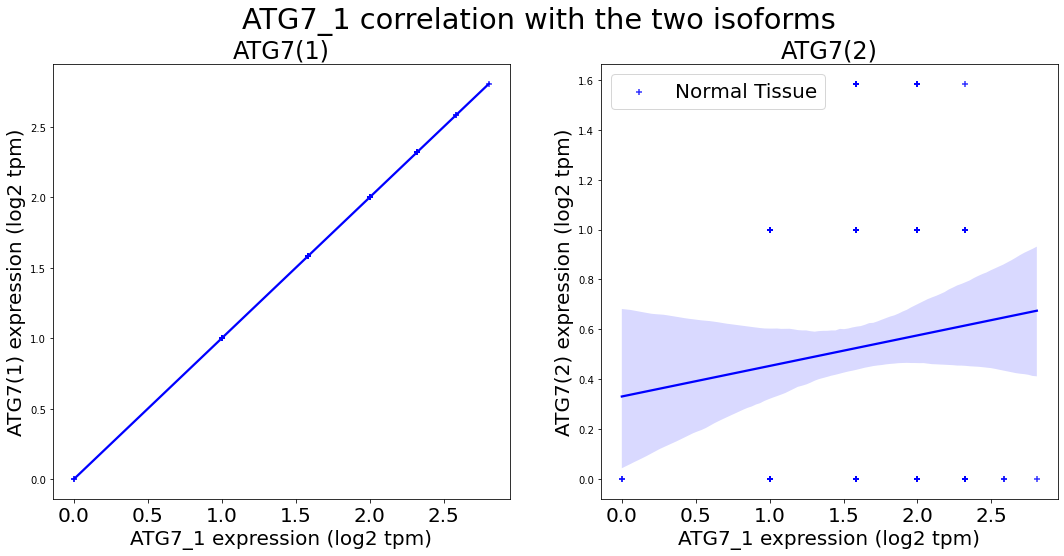

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.20 for a p_value of 7.38e-03


<Figure size 864x576 with 0 Axes>

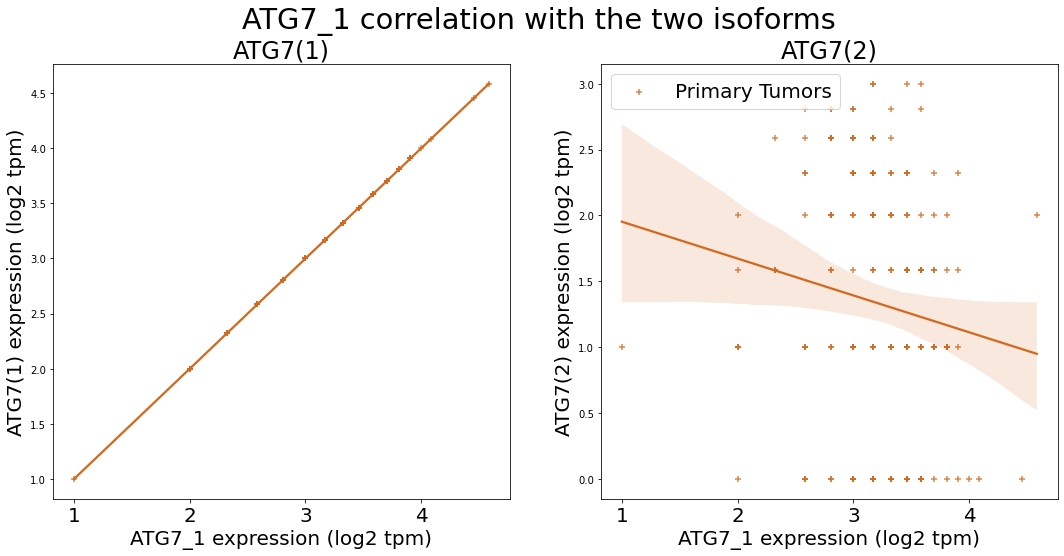


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and MAPK1 is: r_value = 0.38 for a p_value of 3.39e-07
  correlation between ATG7_2 and MAPK1 is: r_value = 0.63 for a p_value of 4.66e-20


<Figure size 864x576 with 0 Axes>

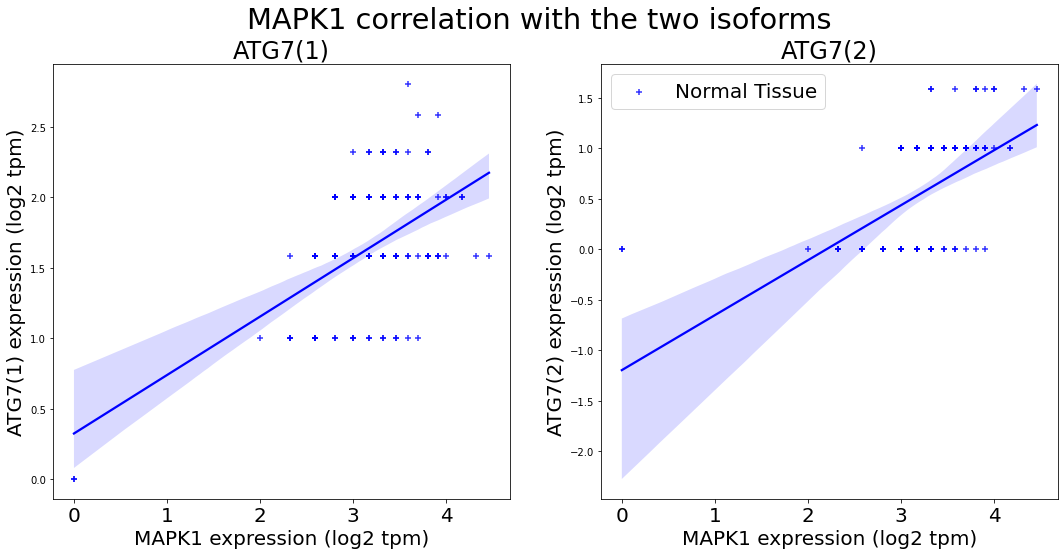

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and MAPK1 is: r_value = -0.23 for a p_value of 2.31e-03
  correlation between ATG7_2 and MAPK1 is: r_value = 0.75 for a p_value of 1.03e-33


<Figure size 864x576 with 0 Axes>

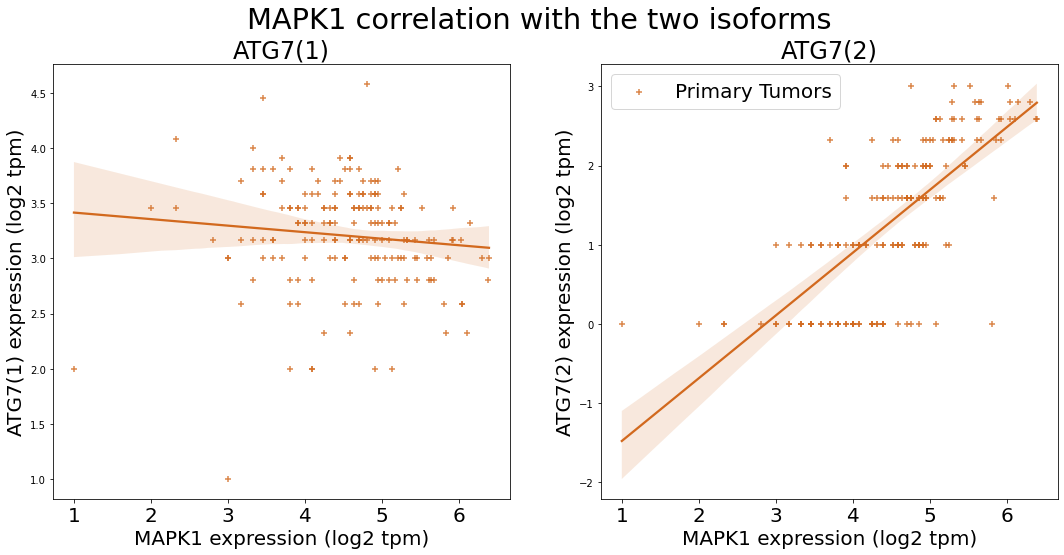


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and PDL1 is: r_value = 0.33 for a p_value of 1.53e-05
  correlation between ATG7_2 and PDL1 is: r_value = -0.08 for a p_value of 3.32e-01


<Figure size 864x576 with 0 Axes>

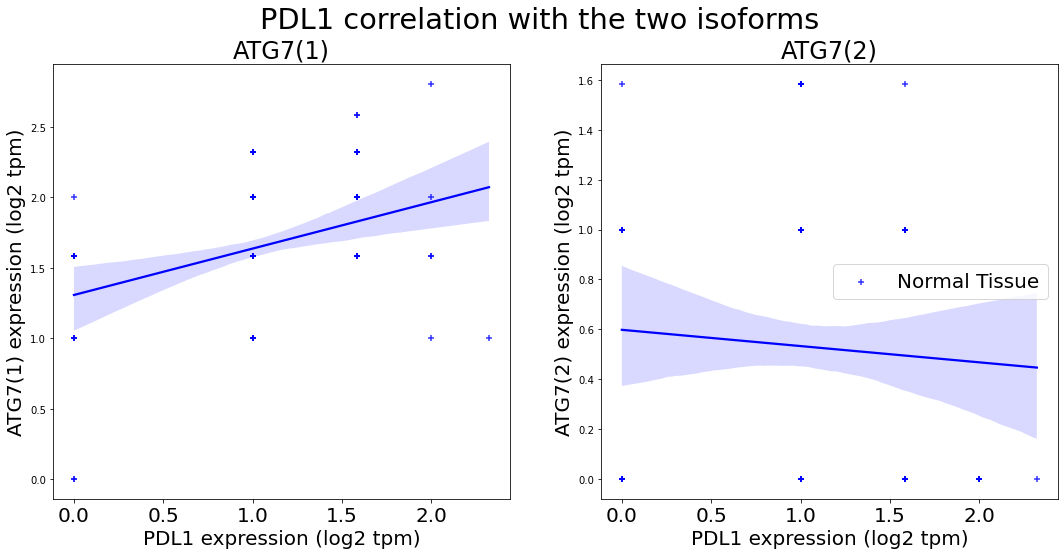

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and PDL1 is: r_value = 0.20 for a p_value of 6.58e-03
  correlation between ATG7_2 and PDL1 is: r_value = 0.46 for a p_value of 7.83e-11


<Figure size 864x576 with 0 Axes>

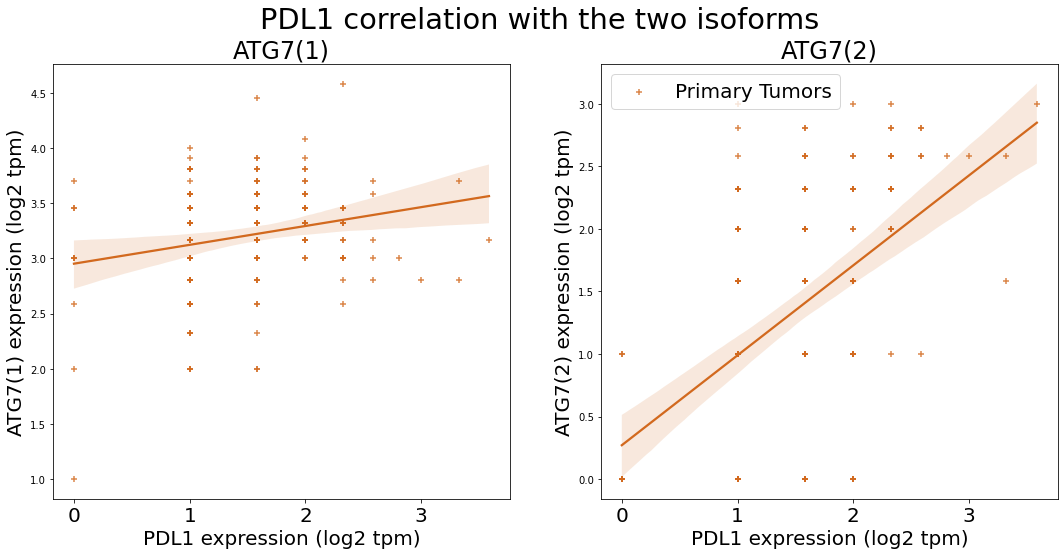


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and HK2 is: r_value = 0.27 for a p_value of 4.60e-04
  correlation between ATG7_2 and HK2 is: r_value = 0.16 for a p_value of 4.39e-02


<Figure size 864x576 with 0 Axes>

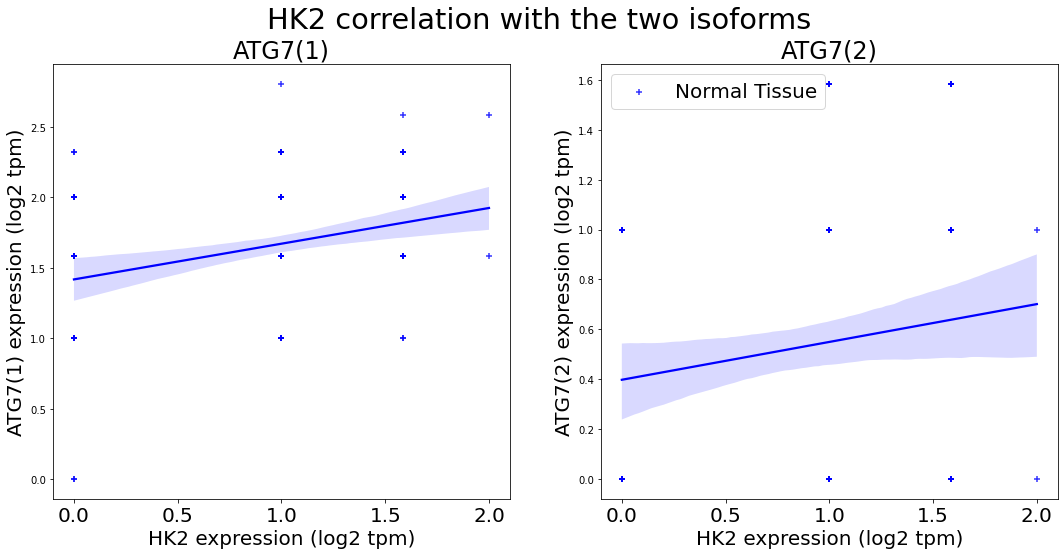

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and HK2 is: r_value = 0.13 for a p_value of 7.59e-02
  correlation between ATG7_2 and HK2 is: r_value = 0.30 for a p_value of 3.96e-05


<Figure size 864x576 with 0 Axes>

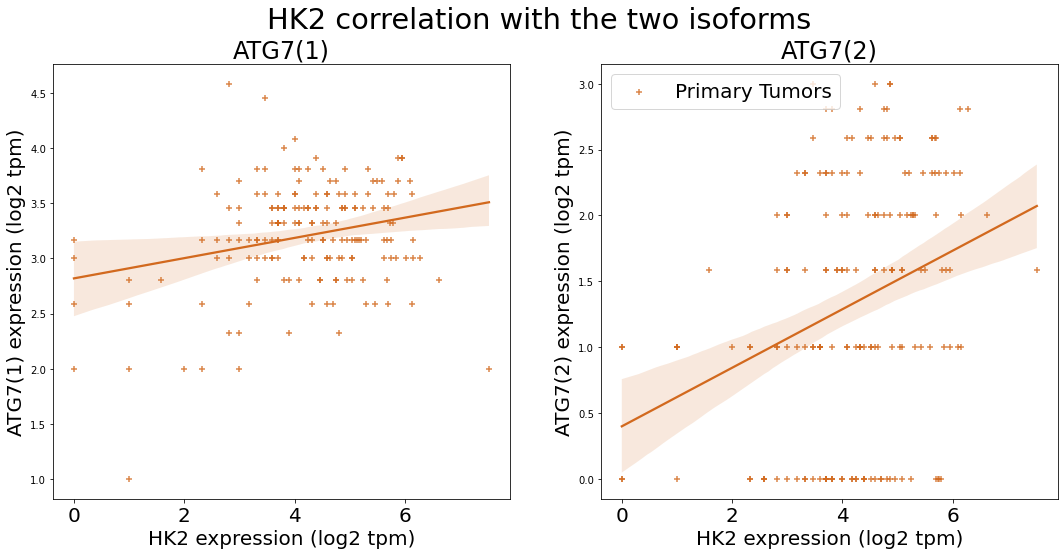


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and PFKP is: r_value = 0.62 for a p_value of 2.75e-19
  correlation between ATG7_2 and PFKP is: r_value = 0.11 for a p_value of 1.44e-01


<Figure size 864x576 with 0 Axes>

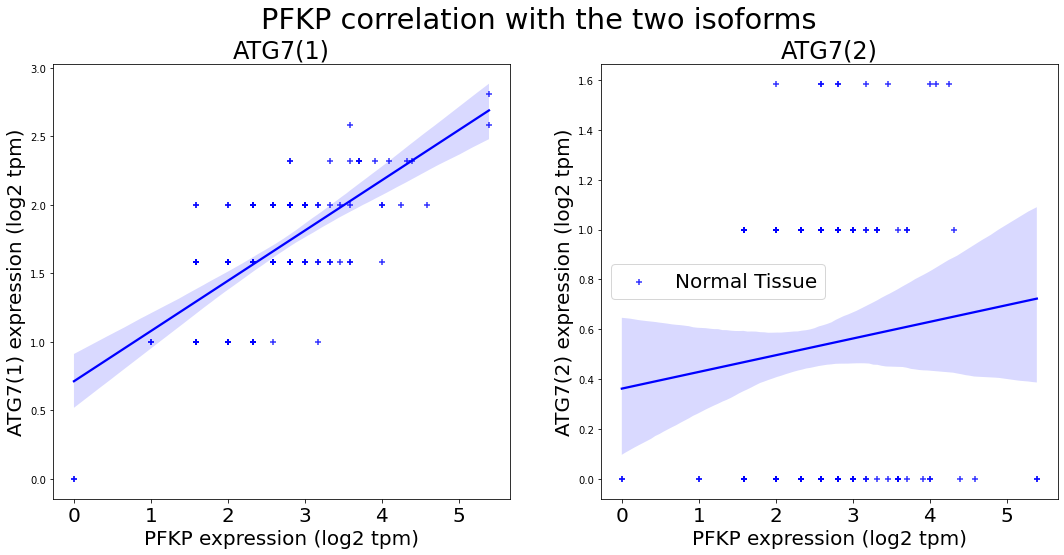

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and PFKP is: r_value = 0.21 for a p_value of 5.23e-03
  correlation between ATG7_2 and PFKP is: r_value = 0.16 for a p_value of 3.63e-02


<Figure size 864x576 with 0 Axes>

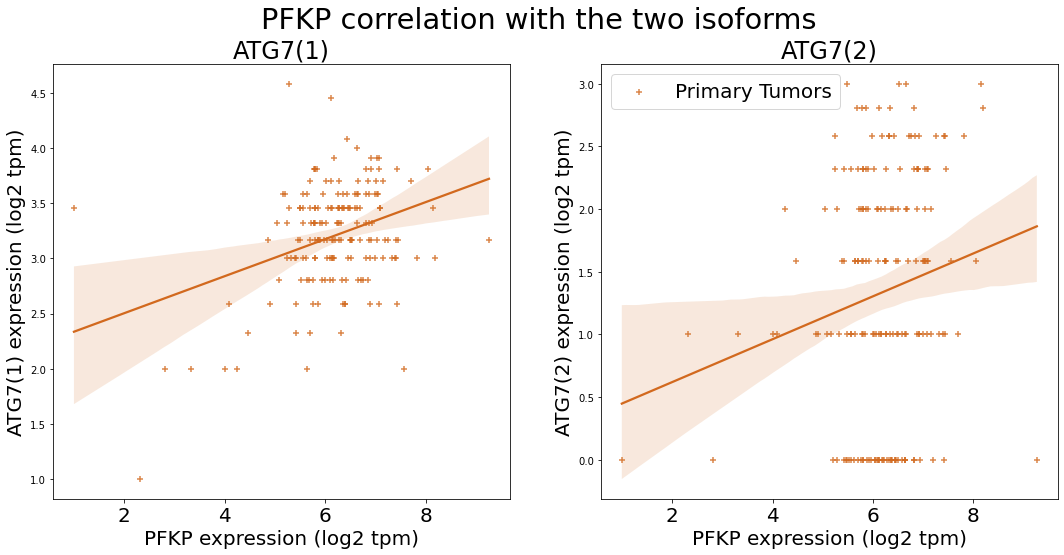


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and YAP1 is: r_value = 0.65 for a p_value of 2.25e-21
  correlation between ATG7_2 and YAP1 is: r_value = 0.22 for a p_value of 4.05e-03


<Figure size 864x576 with 0 Axes>

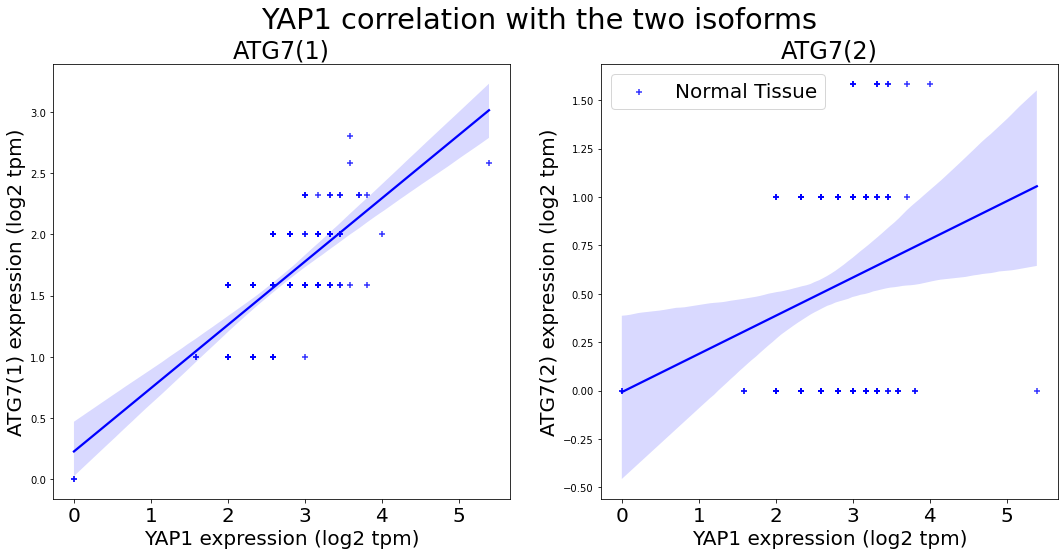

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and YAP1 is: r_value = -0.02 for a p_value of 8.32e-01
  correlation between ATG7_2 and YAP1 is: r_value = 0.64 for a p_value of 6.53e-22


<Figure size 864x576 with 0 Axes>

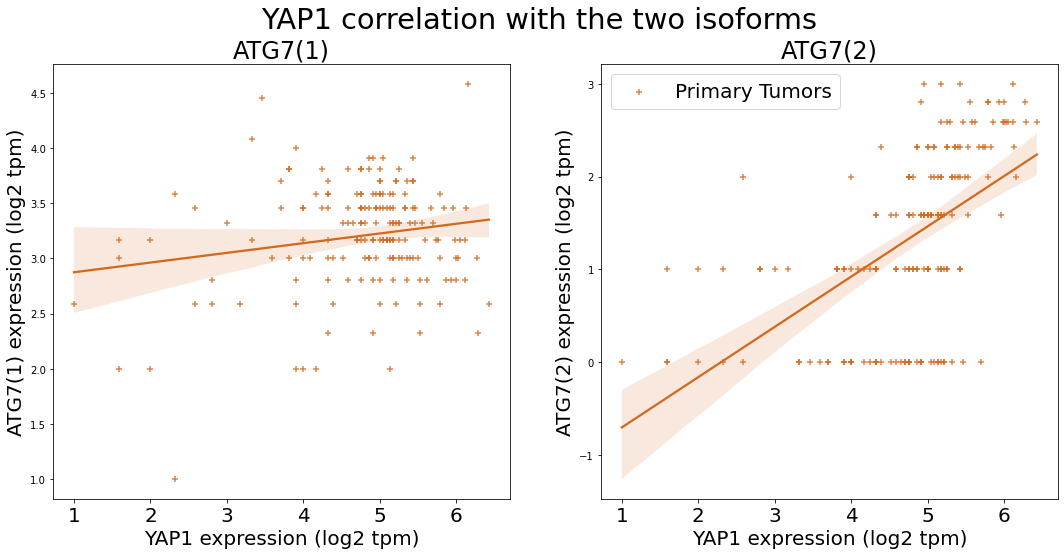


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and AJUBA is: r_value = 0.31 for a p_value of 5.74e-05
  correlation between ATG7_2 and AJUBA is: r_value = -0.05 for a p_value of 5.23e-01


<Figure size 864x576 with 0 Axes>

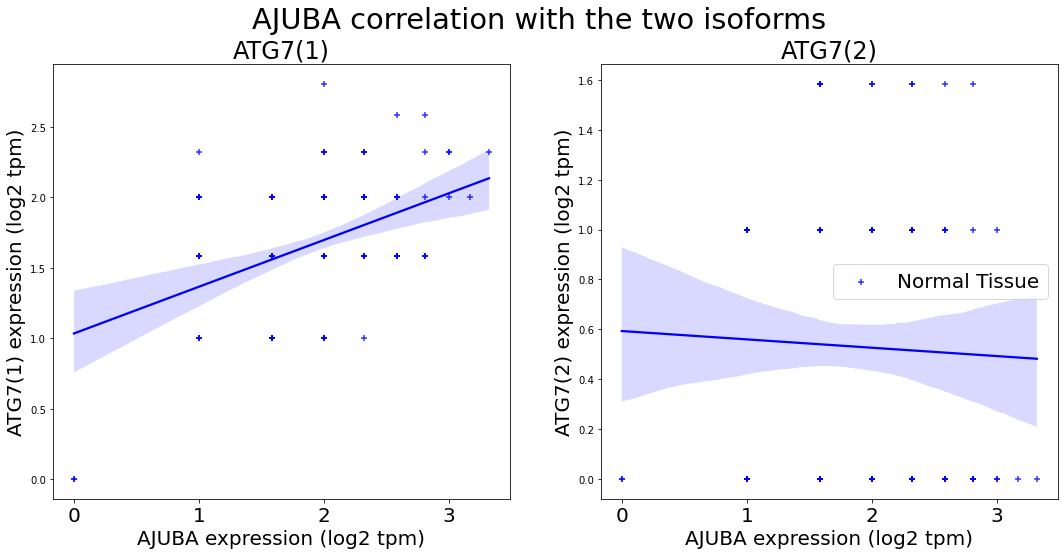

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and AJUBA is: r_value = 0.16 for a p_value of 3.16e-02
  correlation between ATG7_2 and AJUBA is: r_value = 0.28 for a p_value of 1.84e-04


<Figure size 864x576 with 0 Axes>

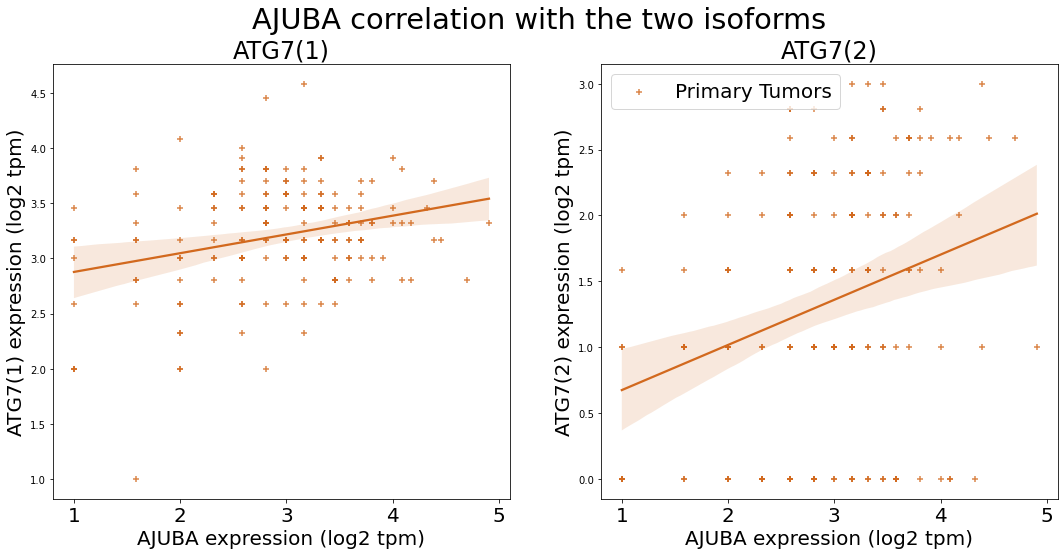


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and YBX1 is: r_value = 0.57 for a p_value of 6.03e-16
  correlation between ATG7_2 and YBX1 is: r_value = 0.32 for a p_value of 1.90e-05


<Figure size 864x576 with 0 Axes>

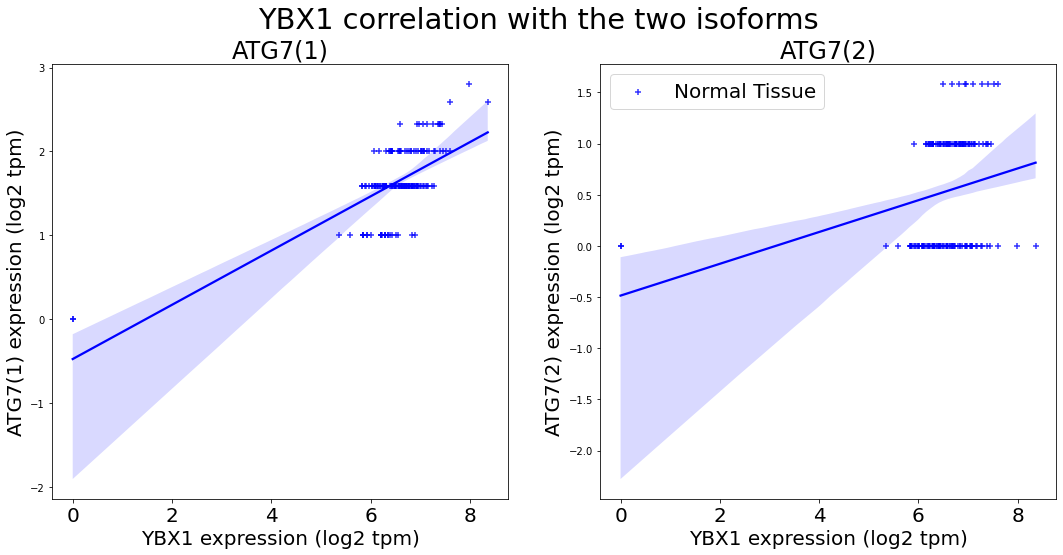

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and YBX1 is: r_value = 0.23 for a p_value of 2.21e-03
  correlation between ATG7_2 and YBX1 is: r_value = 0.38 for a p_value of 1.82e-07


<Figure size 864x576 with 0 Axes>

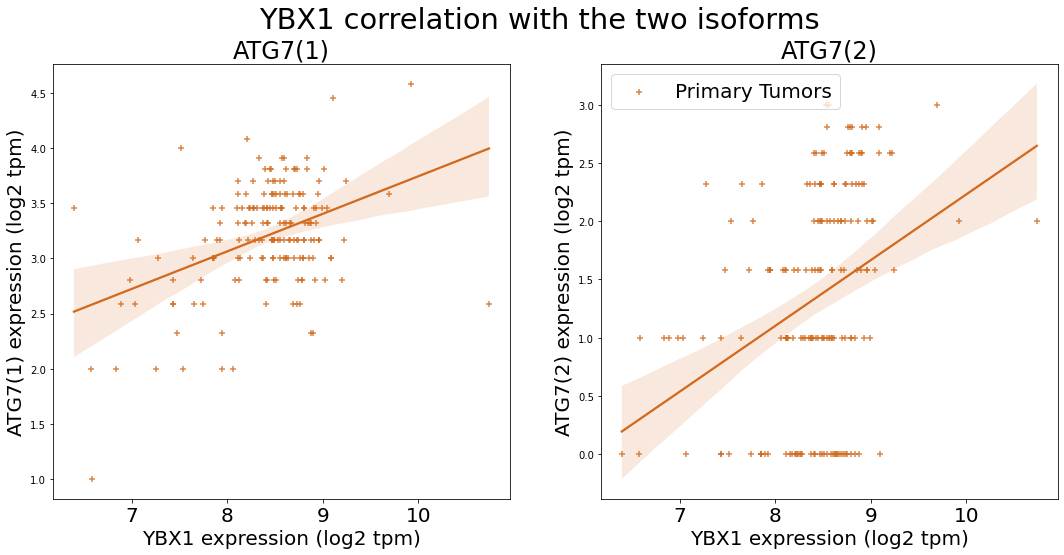


Normal Tissue : (167, 19387)
 0 are removed from head and tail
 without extremities: (167, 19387)

Normal Tissue
  correlation between ATG7_1 and TGFB1 is: r_value = 0.61 for a p_value of 1.33e-18
  correlation between ATG7_2 and TGFB1 is: r_value = 0.16 for a p_value of 3.53e-02


<Figure size 864x576 with 0 Axes>

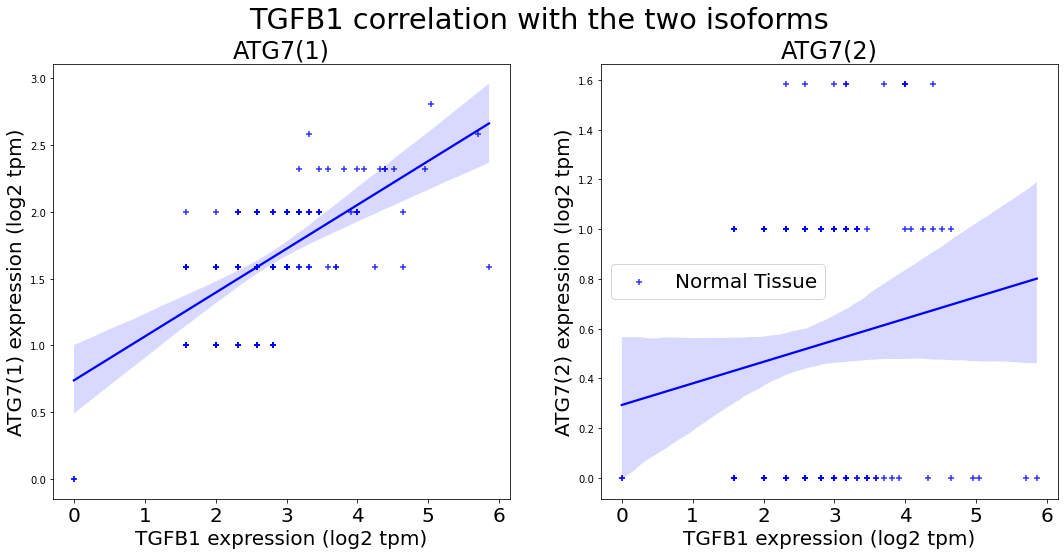

Primary Tumors : (178, 19387)
 0 are removed from head and tail
 without extremities: (178, 19387)

Primary Tumors
  correlation between ATG7_1 and TGFB1 is: r_value = 0.46 for a p_value of 1.07e-10
  correlation between ATG7_2 and TGFB1 is: r_value = 0.02 for a p_value of 7.41e-01


<Figure size 864x576 with 0 Axes>

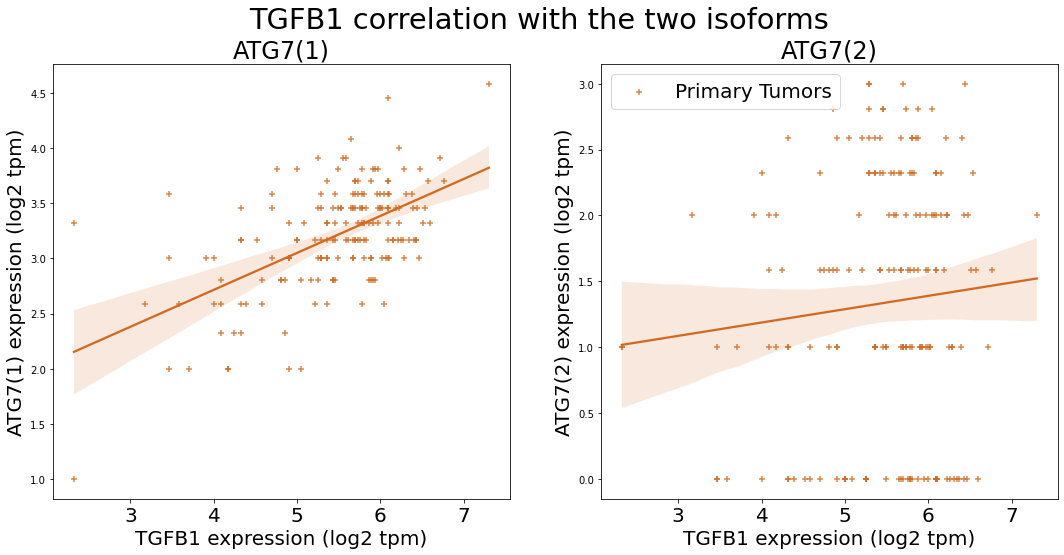

<Figure size 864x576 with 0 Axes>

In [19]:
#Graphic representation, two graphs in one, remove the extremities to have better graph 
all_tissue_used = [[pancreas_normal_atg7_proteinGE,'Normal Tissue', 'blue'], 
                   [pancreas_primary_atg7_proteinGE,'Primary Tumors', 'chocolate']]

genes = [[ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'],  
         [PDL1, 'PDL1'], [HK2, "HK2"], [PFKP,'PFKP'], 
         [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
    for df in all_tissue_used:
        #sort by value, remove the extremities
        print(df[1], ':', df[0].shape)
        for_genes = df[0].sort_values([gene[0]], ascending = False) 
        lenght = len(for_genes)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extrem = for_genes.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extrem.shape)
        print()
        
        
        x = df_no_extrem[gene[0]].to_list()
        y1 = df_no_extrem['ATG7_1'].to_list()
        y2 = df_no_extrem['ATG7_2'].to_list()
        
        #Statistic
        print(df[1])
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        
        #graph
        fig, ax = plt.subplots(1,2, figsize=(18,8))
        name = gene[1]+ " correlation with the two isoforms"
        name2 = gene[1]+ " expression (log2 tpm)"

        fig.suptitle(name, fontsize="x-large")
 
        #ATG7(1) graph
    
        fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(1)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(1) expression (log2 tpm)')
        
        #ATG7(2) graph
        fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(2)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(2) expression (log2 tpm)')
        
        plt.legend()
        plt.show()
        plt.clf()
    print()